# Laborator 2

Saptamana 9-13 martie 2020

Continut:
1. Biblioteca ipywidgets
1. Exercitii cu ipywidgets

## Folosire de controale grafice

Notebook-urile - indiferent ca se ruleaza in Jupyter lab sau Jupyter notebook - se pot folosi pentru demo-uri interactive. O varianta este modificarea codului in timpul demo-ului si rularea manuala a celulelor afectate - nu intotdeauna rapid de facut. O alta varianta este folosirea de controale grafice care sa permita utilizatorului sa modifice optiuni, valori de parametri etc. 

[ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) este o biblioteca de controale grafice care permit interactiune cu utilizatorul. Mai jos sunt cateva demo-uri de urmarit. 

* Demo 1: [![Alt text](https://img.youtube.com/vi/nRmkS_6ngCU/0.jpg)](https://www.youtube.com/watch?v=nRmkS_6ngCU)

* Demo 2: [![Alt text](https://img.youtube.com/vi/j5d7vOQBttI/0.jpg)](https://www.youtube.com/watch?v=j5d7vOQBttI)

* Demo 3: [![Alt text](https://img.youtube.com/vi/wxVx54ax47s/0.jpg)](https://www.youtube.com/watch?v=wxVx54ax47s)

* Demo 4: [![Alt text](https://img.youtube.com/vi/i40d8-Hu4vM/0.jpg)](https://www.youtube.com/watch?v=i40d8-Hu4vM)

### Exemple de utilizare

Documentatia completa si exemple sunt date [aici](https://ipywidgets.readthedocs.io/en/stable/user_guide.html).

Incarcarea pachetului de `ipywidgets` se face prin:

In [ ]:
import ipywidgets as widgets

De regula, e nevoie si de alte pachete, de exemplu:

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual

Cel mai simplu control utilizabil este `interact`. El poate prelua ca prim parametru numele unei functii, iar al doilea parametru dicteaza forma controlului: slider, combo box, checkbox etc:

In [ ]:
def n_factorial(n:int) -> int:
    """Calculeaza n factorial
    :param n: intreg >= 0 pt care se calculeaza factorialul
    :return: valoarea lui n!
    """
    p = 1
    for i in range(1, n+1):
        p *= i
    return str(n) + "!= " + str(p)

In [ ]:
interact(n_factorial, n=100)

Pentru limitarea domeniului in care $n$ poate sa ia valori se va folosi:

In [ ]:
interact(n_factorial, n=(0, 100));

Pentru a evita actualizarea sacadata a valorilor afisate, se prefera inhibarea feedback-ului in timp real, precum in [Disabling continuous updates](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html#Disabling-continuous-updates). 

Pentru alte tipuri de controale folosind interact, se poate folosi:

In [ ]:
def g(x, y, z, t):
    return (x, y, z, t)

interact(g, x=True, y=(1.0, 10.0, 0.5), z='Un text', 
         t={'English':'Hello', 'Romanian':'Salut', 'Spanish':'Hola'})

Exemplu: Sa se deseneze graficul functiei $f:[left, right] \rightarrow \mathbb{R}$, $f(x) = a\cdot x^2 + b\cdot x + c$, cu $a, b, c$ coeficienti reali.

Rezolvare:

In [ ]:
# import de pachete numerice si grafice

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def f_square(a=10, b=20, c=-10,left=-10, right=20) -> None:
    '''Afiseaza graficul unei functii de gradul al doilea de forma:
    f(x)=a*x**2 + b*x + c. Valorile lui x sunt luate din intervalul 
    [left, right] prin discretizare.
    :param a: coeficientul lui x**2
    :param b: coeficientul lui x
    :param c: termenul liber
    :param left: capatul din stanga al intervalului peste care se face 
    reprezenatrea
    :param right: capatul din dreapta al intervalului peste care se face 
    reprezenatrea
    :return: None
    '''
    assert left < right
    range_x = np.linspace(left, right, 100)
    values_f = a * range_x ** 2 + b * range_x + c 
    plt.figure(figsize=(10, 8))
    plt.xlabel('x')
    plt.ylabel(str(a) + '$\cdot x^2 + $' + str(b) + '$\cdot x + $' + str(c))
    plt.plot(range_x, values_f, color='red')
    plt.grid(axis='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.show()
    
interact(f_square, a=(-100, 100.0), b=(-100, 100.0), c=(-100, 100.0), d=(-100, 100.0), e=(-100, 100.0));

In [ ]:
def sinusoid(f=10):
    range_x = np.linspace(-5, 5, 100)
    values_f = np.sin(2 * np.pi * f * range_x)
    plt.xlabel('x')
    plt.ylabel(f'$2 \cdot \pi \cdot {f} \cdot x$')
    plt.grid(axis='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot(range_x, values_f)
    
interact(sinusoid, f = (1, 100.0, 0.5));

In [ ]:
def f(x):
    """calcul functie intr-un punct"""
    return x ** 2 - 10 * x + 50

def f_values(left=-10, right=10):
    """calcul functie pe interval"""
    x = np.linspace(left, right, 100)
    return x, f(x)

def f_prime(x):
    """Calcul derivata f
    :param x: punctul in care se calculeaza derivata
    :return: f'(x)
    """
    return 2 * x - 10

def graph_f_and_derived(x, left=-30, right=30):
    # calcul valoare functie f
    x_range, fx = f_values(left, right)
    
    # intervalul pe care se reprezinta tangenta la grafic
    x_segment = np.linspace(x-10, x+10, 100)
    # panta tangentei la grafic este derivata functiei in pctul de tangenta
    slope = f_prime(x)
    
    #calcul puncte de tangenta
    y_segment = f(x) + slope * (x_segment - x)
    
    plt.figure(figsize=(20, 10))
    plt.plot(x_range, fx, color='red')
    plt.plot(x_segment, y_segment, color='blue')
    
# graf_f_and_derived(10, left=-30, right=30)

interact(graph_f_and_derived, x = (-20, 20))

## Exercitii `ipywidgets`:

1. (la clasa) Consideram functia $f(x) = x^2$ si punctul $P=(5, 3)$. Folosind controale grafice ipywidgets, sa se modifice functia $f$ prin translatarea ei pe orizontala si pe verticala, a.i. minimul functiei sa sa afle in punctul $P$; a se vedea mai jos exemplu de translatie pe verticala. Se cere desenarea axelor Ox si Oy cu reprezentarea puntului $P$ printr-un dreptunghi, desenarea functiei $f$ folosind o curba de 50 de puncte. Se vor determina coeficientii necesari mutarii functiei si se vor defini controale pentru acestea. ![vertical translation](./images/vertical_translation.png)
1. (3 puncte) Generati o lista de 20 de perechi de valori $\{x_i, y_i\}_{i=0,19}$ in intervalul [0, 10), afisati aceste valori pe un grafic, impreuna cu o dreapta definita de o functie liniara $y=a*x+b$. Intr-un alt plot afisati, ca histograma, distanta dintre un punct de coordonate $(x_i, y_i)$ si punctul de intersectie a verticalei duse prin $x_i$ cu dreapta data. Dreapta trebuie sa fie controlabila din widgets, prin cei doi coeficienti. Constatati modificarea histogramei in functie de pozitia dreptei si calculati suma: $\sum_{i=0}^{19} (y_i - (a\cdot x_i + b))^2$, adica suma patratelor lungimilor segmentelor verzi de mai jos.
![linear regression](./images/linreg.png)
*Indicatii:*
    1. Pentru generare de valori distribuite uniform in intervalul [0, 1) puteti folosi functia [numy.random.uniform](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html) iar vectorul obtinut sa il inmultiti cu 10; in felul acesta, numerele generate vor fi uniform distribuite in intervalul $[0, 10)$.
    1. Puteti opta sa returnati cele 20 de puncte sub forma `vector_x`, `vector_y`.
1. (5 puncte) Incarcati fisierul `data/carbon_nanotubes.csv` (adaptare dupa [Carbon Nanotubes Data Set](http://archive.ics.uci.edu/ml/datasets/Carbon+Nanotubes)). In functie de alegerile exprimate de un utilizator, afisati intr-un grafic 2D coloanele numerice alese (de exemplu, coloana 0 si coloana 2).
*Indicatii/optiuni*:
    1. Incarcarea de date se poate face cu numpy, functia [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). Specificati faptul ca se sare peste prima linie din fisier (header). Alternativ, puteti folosi [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).
    1. Numarul de coloane din setul de date se poate afla cu `data.shape[1]`.
    1. Pentru cele doua alegeri puteti sa instantiati doua obiecte [Dropdown](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Dropdown) sau [Select](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Select).
    1. Daca in variabila `data` sunt datele incarcate, selectarea coloanei `i` se face cu `data[:, i]`.
1. (2 puncte) Urmariti prezentarile date la inceputul laboratorului. Faceti o lista cu ceea ce ati dori sa se detalieze in acest semestru la laboratorul de IDS, din materialul furnizat.

### Exercitiul 1

1. (la clasa) Consideram functia $f(x) = x^2$ si punctul $P=(5, 3)$. Folosind controale grafice ipywidgets, sa se modifice functia $f$ prin translatarea ei pe orizontala si pe verticala, a.i. minimul functiei sa sa afle in punctul $P$; a se vedea mai jos exemplu de translatie pe verticala. Se cere desenarea axelor Ox si Oy cu reprezentarea puntului $P$ printr-un dreptunghi, desenarea functiei $f$ folosind o curba de 50 de puncte. Se vor determina coeficientii necesari mutarii functiei si se vor defini controale pentru acestea. ![vertical translation](./images/vertical_translation.png)

In [ ]:
def plt_arrays(x, y, title="", color="red", linestyle="solid", linewidth=2):
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.plot(x, y, color = color, linestyle = linestyle, linewidth = linewidth)
    axes.set_title(title)
    axes.grid()
    plt.show()

In [ ]:
def functie(a, b, c, **kwargs):
    x = np.linspace(-10, 10, 20)
    y = a*(x**2) + b*c + c
    
    title = "$f(x) = (%s)x^{2} + (%s)x + (%s)$" % (a,b,c)
    title += "\n"
    
    plt_arrays(x, y, title=title, **kwargs)

In [ ]:
f = interact(
    functie,
    a=(-5.,10.),
    b=(-5.,10.),
    c=(-5.,10.),
    )

### Exercitiul 2

1. (3 puncte) Generati o lista de 20 de perechi de valori $\{x_i, y_i\}_{i=0,19}$ in intervalul [0, 10), afisati aceste valori pe un grafic, impreuna cu o dreapta definita de o functie liniara $y=a*x+b$. Intr-un alt plot afisati, ca histograma, distanta dintre un punct de coordonate $(x_i, y_i)$ si punctul de intersectie a verticalei duse prin $x_i$ cu dreapta data. Dreapta trebuie sa fie controlabila din widgets, prin cei doi coeficienti. Constatati modificarea histogramei in functie de pozitia dreptei si calculati suma: $\sum_{i=0}^{19} (y_i - (a\cdot x_i + b))^2$, adica suma patratelor lungimilor segmentelor verzi de mai jos.
![linear regression](./images/linreg.png)
*Indicatii:*
    1. Pentru generare de valori distribuite uniform in intervalul [0, 1) puteti folosi functia [numy.random.uniform](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html) iar vectorul obtinut sa il inmultiti cu 10; in felul acesta, numerele generate vor fi uniform distribuite in intervalul $[0, 10)$.
    1. Puteti opta sa returnati cele 20 de puncte sub forma `vector_x`, `vector_y`.

### Parametri

In [ ]:
n = 5
left = 0
right = 10

In [ ]:
def draw_random(left: int, right: int, n: int) -> np.array:
    
    """
    Functia 
    """
    
#     r = np.random.uniform(low = left, high = right, size = n)
    r = np.random.randint(low = left, high = right, size = n)
    #print("r:", r)
    
#     v = r * 10
    #print("v:", v)
    
    return r

x = draw_random(left, right, n)
print("x:", x)
y = draw_random(left, right, n)
print("y:", y)

### Determinarea punctelor

In [ ]:
points = zip(x, y)

# print(points)
# for p in points:
#     print(p)
    
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x, y)
plt.show()

In [45]:
import matplotlib.pyplot as plt
import numpy as np

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

def f_line_graph(a: float, b: float, range_x, values_f):
    
    """
    
    """
    
    
def distance_to_line(self, p1, p2):
    x_diff = p2.x - p1.x
    y_diff = p2.y - p1.y
    num = abs(y_diff*self.x - x_diff*self.y + p2.x*p1.y - p2.y*p1.x)
    den = math.sqrt(y_diff**2 + x_diff**2)
    return num / den

def distance(x1, y1, x2, y2):
    x_diff = x2 - x1
    y_diff = y2 - y1
    d = np.sqrt(x_diff**2 + y_diff**2)
    return d

left=0
right=20  
#     0  1  2  3  4
pX = [2, 1, 3, 6, 4]
pY = [5, 4, 3, 1, 4]

# def functie(a: float, b: float) -> float:
#     y = a * x + b
#     return y

def functie(a, b, x):
    y = a * x + b
    return y

# for i in range(len(x)):
#     plt.axvline(x[i], ymax=y[i], color='b')
    
def f_line(a, b):

    range_x = np.linspace(left, right, 2)
    
    values_f = a * range_x + b
    
    plt.figure(figsize=(10, 10))
    plt.xlabel('x')
    plt.ylabel('y')
    
    title = str(a) + '$\cdot x + $' + str(b)
    title += "\n"
    plt.title(title)
    
    plt.plot(range_x, values_f, color='blue')
    plt.grid(axis='both')
    
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    
#     y = functie(2.5, 2.5)
    for i in range(len(pX)):
        z = functie(a, b, pX[i])
#         z = functie(2, 3, pX[i])
        print("P(", pX[i], ",", z, ")")
        plt.vlines(x=pX[i], ymin=pY[i], ymax=z)
    
#     j = 3
#     z = functie(2, 3, pX[j])
#     plt.vlines(x=pX[j], ymin=pY[j], ymax=z)
#     x1 = 6
#     y1 = 1
#     x2 = 6 
#     y2 = 15
#     d = distance(x1, y1, x2, y2)
#     print(d)
    
    plt.scatter(pX, pY)
    
    plt.show()

# f_line(2,3)

# f = interact(
#     f_line,
#     a=2,
#     b=3
#     )

f = interact(
    f_line,
    a=(-7,5),
    b=(-7,5)
    )

interactive(children=(IntSlider(value=-1, description='a', max=5, min=-7), IntSlider(value=-1, description='b'…

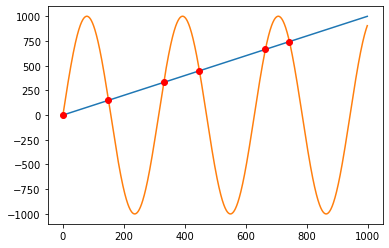

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 1000)
f = np.arange(0, 1000)
g = np.sin(np.arange(0, 10, 0.01) * 2) * 1000

# print("x:", x)
# print("f:", x)
# print("g:", x)

plt.plot(x, f, '-')
plt.plot(x, g, '-')

idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
plt.plot(x[idx], f[idx], 'ro')
plt.show()

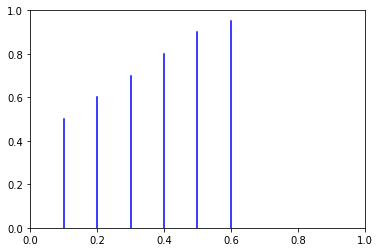

In [24]:
values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
times = [.5, .6, .7, .8, .9, .95]

for i in range(len(times)):
    plt.axvline(values[i], ymax=times[i], color='b')

plt.show()